In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm

In [2]:
%matplotlib notebook

In [3]:
def _coeff_matrix_func(x0, y0, d, a, b):
    return lambda m, n: 4 / (len(m) * len(n)) * np.sum(d[None, None, :] 
                                                       * np.sin(np.pi / a * m[:, None, None] * x0[None, None, :]) 
                                                       * np.sin(np.pi / b * n[None, :, None] * y0[None, None, :]),
                                                       axis=2)

In [4]:
def _lambda_matrix_func(a, b):
    return lambda m, n: np.pi**2 * ((m[:, None] / a)**2 + (n[None, :] / b)**2)

In [5]:
def dissipation_func(x0, y0, d0, a, b, m, n):
    x0, y0, d0, a, b, m, n = np.atleast_1d(x0, y0, d0, a, b, m, n)
    
    coeff_matrix = _coeff_matrix_func(x0, y0, d0, a, b)
    lambda_matrix = _lambda_matrix_func(a, b)
    
    m_expanded = np.expand_dims(m, axis=(1, 2, 3, 4))
    n_expanded = np.expand_dims(n, axis=(0, 2, 3, 4))
    
    coeff_expanded = np.expand_dims(coeff_matrix(m, n), axis=(2, 3, 4))
    lambda_expanded = np.expand_dims(lambda_matrix(m, n), axis=(2, 3, 4))
    
    return lambda x, y, t: np.sum(coeff_expanded
                                  * np.sin(np.pi / a * m_expanded * np.expand_dims(x, axis=(0, 1, 3, 4))) 
                                  * np.sin(np.pi / b * n_expanded * np.expand_dims(y, axis=(0, 1, 2, 4)))
                                  * np.exp(-lambda_expanded * np.expand_dims(t, axis=(0, 1, 2, 3))), 
                                 axis=(0, 1))

In [6]:
x0 = np.array([1, 1.2, 2])/4
y0 = np.array([1.3, 2, 2.3])/4
d0 = np.array([1, 2, 3])
a, b = 1, 1
m = np.arange(1, 100)
n = np.arange(1, 100)

In [7]:
u_func = dissipation_func(x0, y0, d0, a, b, m, n)

In [8]:
x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)
t = np.linspace(0, 0.01, 5)

In [9]:
u = u_func(x, y, t)

In [10]:
x2, y2 = np.meshgrid(x, y)
u0 = u[:, :, 0]

<IPython.core.display.Javascript object>


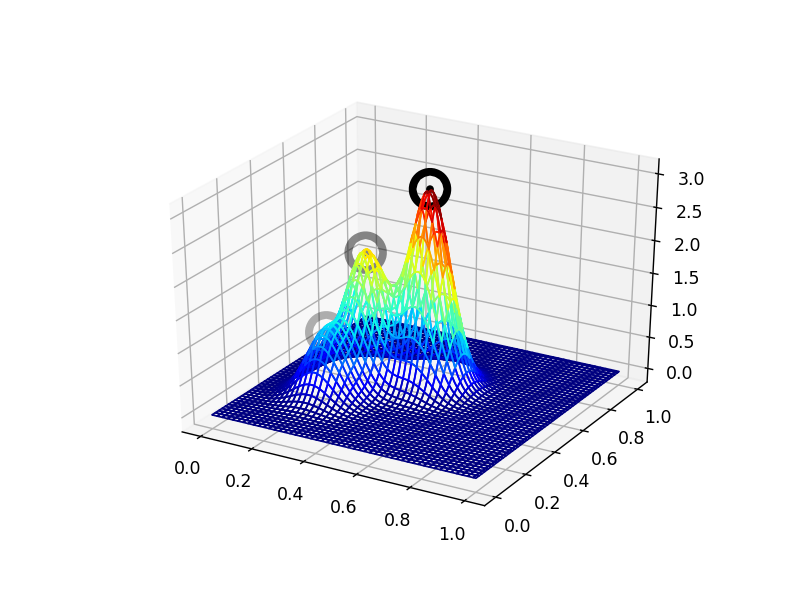

In [11]:
u0 = u[:, :, 1]
u0 *= 3 / np.max(u0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x0, y0, d0, marker='o', color='black', linewidths=20)

# Normalize the colors based on Z value
norm = plt.Normalize(u0.min(), u0.max())
colors = cm.jet(norm(u0))
surf = ax.plot_surface(y2, x2, u0, facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))

In [31]:
x0 = np.array([1, 1.2, 2])/4
y0 = np.array([1.3, 2, 2.3])/4
d0 = np.array([1, 2, 3])
a, b = 1, 1
m = np.arange(1, 20)
n = np.arange(1, 20)

x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)
t = np.linspace(0, 0.01, 100)

In [32]:
u_funcs = [dissipation_func(np.array([x0[i]]), np.array([y0[i]]), np.array([d0[i]]), a, b, m, n) 
           for i in range(len(x0))] 

In [33]:
u = [uf(x, y, t) for uf in u_funcs]

In [34]:
un = u * d0[:, None, None, None] / np.max(u, axis=(1, 2))[:, None, None, :]

<IPython.core.display.Javascript object>


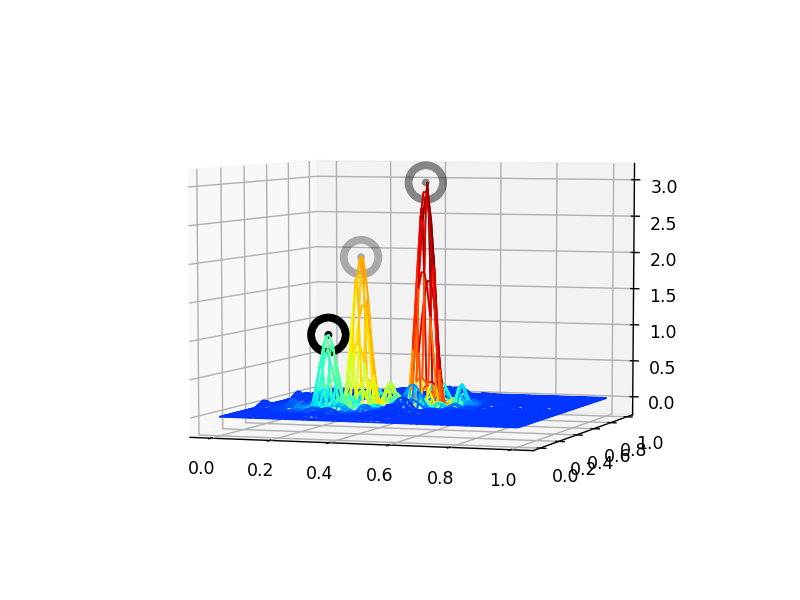

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x0, y0, d0, marker='o', color='black', linewidths=20)

# Normalize the colors based on Z value
norm = plt.Normalize(un.min(), un.max())
colors = cm.jet(norm(u0))
surf = ax.plot_surface(y2, x2, np.max(un[:, :, :, 1], axis=0), facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))

In [36]:
dissipation_func(x0[0], y0, d0, a, b, m, n)

<function __main__.dissipation_func.<locals>.<lambda>(x, y, t)>